In [69]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

class SIRModel():
    """
    Blabla sur SIR model
    
    TODO : equations

    """
    def __init__(self, beta=0.3, gamma=0.1):
        self.params = {}
        self.params["beta"] = beta
        self.params["gamma"] = gamma

    def _curve_fit(self, t, y, bounds=(0,np.inf)):
        def f(*params):
            y_t = self.predict(t, params)
            infec_pred = y_t[0], recov_pred = y_t[1], dead_pred = y_t[2] 
            return np.hstack((infec_pred, recov_pred, dead_pred))
            
        fitted_params, pcov = curve_fit(f, t, y, p0=)
        
    def fit(self, t, init_population, y_infect, y_recov, y_dead):
        init_SIR = (init_population - y_infect[0] - y_recov[0], y_infect[0],  y_recov[0])
        fitted_params, pcov = curve_fit(predict)
        return self

    """
        S = those susceptible but not yet infected with the disease
        I = the number of infectious individuals
        R = those individuals who have recovered from the disease and now have immunity to it
    """

    def deriv(self, t, SIR, N, beta, gamma):
        S, I, R = SIR
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    def predict(self, t, init_population, init_infected, init_recovered=0):
        t_inter = (min(t), max(t))
        SIR = (init_population - init_infected - init_recovered, init_infected, init_recovered)
        res = solve_ivp(self.deriv, t_inter, SIR, args=(init_population, self.params["beta"], self.params["gamma"]), t_eval=t)
        return res.y

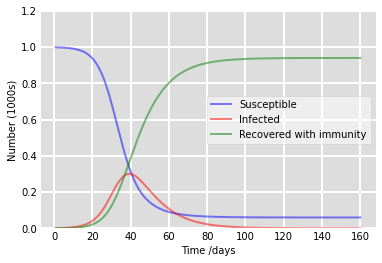

In [70]:
# Variables
day_number = 160 # nb jour 
first_day_inf = 1 # nb  infecté premier jour
nb_person_already_recov = 0
population = 1000

# exec model
t = np.linspace(1, day_number, day_number)
sir_model = SIRModel()
S, I, R = sir_model.predict(t, population, first_day_inf, nb_person_already_recov)

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [73]:
a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
np.hstack(a,b,c)

TypeError: _vhstack_dispatcher() takes 1 positional argument but 3 were given